In [50]:
#Abra el HDF5 para leer

import tables as tabla
import numpy as np

Direccion_Donde_Esta_El_Archivo_HDF5= 'ProyectoFinal/Prueba/dataset1.hdf5'
Media_Substraida = False

# abrir el archivo hdf5
Archivo_HDF5 = tabla.open_file(Direccion_Donde_Esta_El_Archivo_HDF5, mode='r')

# restar la media de entrenamiento
if Media_Substraida:
    media = Archivo_HDF5.root.train_mean[0]
    media = media[np.newaxis, ...]

# Número total de muestras
Numero_De_Dato = Archivo_HDF5.root.Imagen_De_Entrenamiento.shape[0]

print("Leeido con exito") #Imprime mensasje

Leeido con exito


Dato:  1  Entre  Lista de:  30
Etiqueta:  0 Ubicacion en Matriz-> [1. 0. 0. 0. 0. 0.]


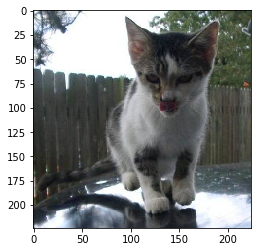

Dato:  2  Entre  Lista de:  30
Etiqueta:  0 Ubicacion en Matriz-> [1. 0. 0. 0. 0. 0.]


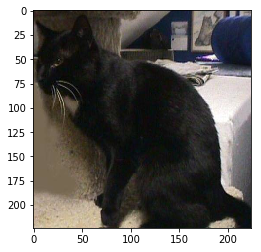

Dato:  3  Entre  Lista de:  30
Etiqueta:  1 Ubicacion en Matriz-> [0. 1. 0. 0. 0. 0.]


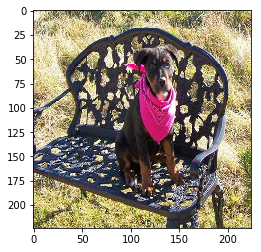

Dato:  4  Entre  Lista de:  30
Etiqueta:  1 Ubicacion en Matriz-> [0. 1. 0. 0. 0. 0.]


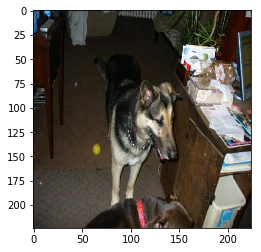

Dato:  5  Entre  Lista de:  30
Etiqueta:  1 Ubicacion en Matriz-> [0. 1. 0. 0. 0. 0.]


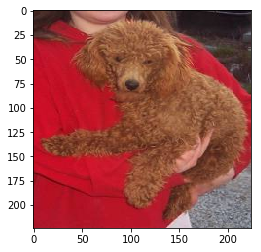

In [51]:
#Mostar los datos

from random import shuffle
from math import ceil
import matplotlib.pyplot as plt

# crear una lista de lotes para mezclarlos 
tamano_del_lote = 8
numero_de_clase= 6
lista_de_lotes = list(range(int(ceil(float(Numero_De_Dato) / tamano_del_lote))))
shuffle(lista_de_lotes)
          
# loop over lotes
for n, i in enumerate(lista_de_lotes):
    i_s = i * tamano_del_lote   # index de la primera imagen de este lote
    i_e = min([(i + 1) * tamano_del_lote, Numero_De_Dato])  # índice de la última imagen de este lote  

    # leer las imágenes por lotes y eliminar el significado del entrenamiento
    imagenes = Archivo_HDF5.root.Imagen_De_Entrenamiento[i_s:i_e]
    if Media_Substraida:
        imagenes -= media

    # leer las etiquetas y convertir a una codificación en caliente
    Etiquetas = Archivo_HDF5.root.Etiquetas_De_Entrenamiento[i_s:i_e]
    Primera_Etiqueta_Caliente = np.zeros((tamano_del_lote, numero_de_clase))
    Primera_Etiqueta_Caliente[np.arange(tamano_del_lote), Etiquetas] = 1
    print 'Dato: ', n+1, ' Entre ', 'Lista de: ',len(lista_de_lotes)

    print  'Etiqueta: ',Etiquetas[0], 'Ubicacion en Matriz->', Primera_Etiqueta_Caliente[0, :]
    plt.imshow(imagenes[0])
    plt.show()
   
    if n == 4:  # descanso después de 5 lotes
        break      

Archivo_HDF5.close()
